0.8초 이상 진행될 경우 값 저장

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('Liftoff_result/Level1.csv')
df = df.loc[:, ['time', 'value']]
arr = df.values.tolist()

#csv의 모든 값 추출
value_time = []
value_cord = []
for i in range(len(arr)):
    value_time.append(arr[i][0])
    value_cord.append(arr[i][1])

temp = 0
extreme_value = []

ext_time = []
ext_cord = []

#현재까지의 직선 그래프 추출
def point_extreme(arr, i, temp):
    for j in range(temp, i):
        ext_time.append(arr[j][0])
        ext_cord.append(arr[j][1])    

#극값 찾기
for i in range(1, len(arr)):
    if arr[i][1] != arr[temp][1]:
        #If sum of time over 0.8s, save the value
        if(arr[i-1][0] - arr[temp][0] > 0.8):
            extreme_value.append(arr[temp][1])
            point_extreme(arr, i, temp)
        temp = i

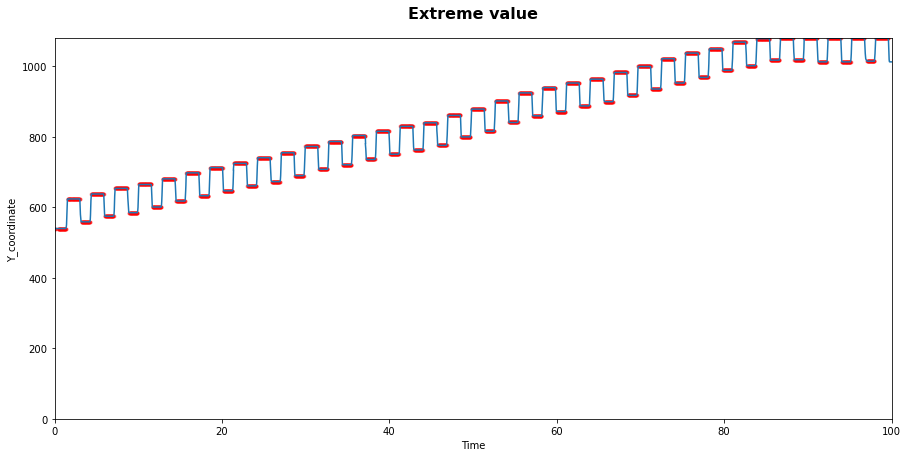

In [38]:
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
fig, ax = plt.subplots(figsize = (15,7))
plt.title('Extreme value', fontdict=title_font, pad = 20)
plt.xlabel('Time')
plt.ylabel('Y_coordinate')
plt.xlim([0, 100])
plt.ylim([0, 1080])
#극값 그리기
ax.scatter(ext_time, ext_cord, alpha = 0.3, s = 3**2, c = 'red')

#실험값 그리기
ax.plot(value_time, value_cord)

plt.show()

In [47]:
#마우스 이동 방향에 따른 이동 픽셀 구분

ms_up = []
ms_down = []

for i in range(len(ext_time) - 1):
    if ext_cord[i] != ext_cord[i+1]:
        # lift-UP
        if ext_cord[i] < ext_cord[i+1]:
            if ext_cord[i+1] != 1080:
                ms_up.append(ext_cord[i+1] - ext_cord[i])
        # lift-DOWN
        else:
            if ext_cord[i+1] != 0:
                ms_down.append(ext_cord[i] - ext_cord[i+1])

#seaborn violinplot으로 그리기 위해 csv 파일로 변환 필요